<a href="https://colab.research.google.com/github/luca-arts/seeingtheimperceptible/blob/main/notebooks/basicSuperRestoration/tests/BasicSR_inference_DFDNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DFDNet - Blind Face Restoration - Inference Demo

[[paper]](https://arxiv.org/abs/2008.00418)  [[official codes]](https://github.com/csxmli2016/DFDNet)

1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU


2. Linking next cloud

In [ ]:
# we'll link the dataset from next-cloud
!curl https://raw.githubusercontent.com/luca-arts/seeingtheimperceptible/main/notebooks/database_mod.py -o /content/database_mod.py

from database_mod import *

link_nextcloud()

nextcloud = '/content/database/'

input_folder, output_folder = create_io(database=nextcloud,topic='basicSuperRestoration',library='DFDNet')
#input_folder, output_folder = create_io(database=nextcloud,topic='skinRetouching/retouchML',library='retouchML')

3. Clone Git repository

In [ ]:
import os
root_path = '/content/BasicSR'

# clone the repository
if not os.path.exists('BasicSR'):
  !git clone https://github.com/xinntao/BasicSR {root_path}

#!rm -rf BasicSR
#!git clone https://github.com/xinntao/BasicSR.git
#%cd BasicSR

3. Set up the enviroment

In [ ]:
# Install pytorch
!pip install torch torchvision

# Check torch and cuda versions
import torch
print('Torch Version: ', torch.__version__)
print('CUDA Version: ', torch.version.cuda)
print('CUDNN Version: ', torch.backends.cudnn.version())
print('CUDA Available:', torch.cuda.is_available())

In [ ]:
# Install requirements
!pip install -r requirements.txt
# DFDNet requires dlib: https://github.com/davisking/dlib
!pip install dlib
# Install BasicSR without cuda extentions
!python setup.py develop

4. Download pretrained models

In [ ]:
!python scripts/download_pretrained_models.py DFDNet
!python scripts/download_pretrained_models.py dlib

## Download demo images
We use the images from [childhood-celebrities-when-they-were-young-kids](https://www.boredpanda.com/childhood-celebrities-when-they-were-young-kids/).

In [ ]:
!mkdir datasets/childhood
!wget https://static.boredpanda.com/blog/wp-content/uploads/2017/03/childhood-celebrities-when-they-were-young-kids-101-58bd73a65dee9__700.jpg -O datasets/childhood/Adele.jpg
!wget https://static.boredpanda.com/blog/wp-content/uploads/2017/03/childhood-celebrities-when-they-were-young-kids-4-58b80eeeefa13__700.jpg -O datasets/childhood/Julia_Roberts.jpg

--2020-11-29 05:18:53--  https://static.boredpanda.com/blog/wp-content/uploads/2017/03/childhood-celebrities-when-they-were-young-kids-101-58bd73a65dee9__700.jpg
Resolving static.boredpanda.com (static.boredpanda.com)... 13.249.43.16, 13.249.43.11, 13.249.43.129, ...
Connecting to static.boredpanda.com (static.boredpanda.com)|13.249.43.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69982 (68K) [image/jpeg]
Saving to: ‘datasets/childhood/Adele.jpg’

datasets/childhood/ 100%[===================>]  68.34K  --.-KB/s    in 0.001s  

2020-11-29 05:18:53 (70.8 MB/s) - ‘datasets/childhood/Adele.jpg’ saved [69982/69982]

--2020-11-29 05:18:53--  https://static.boredpanda.com/blog/wp-content/uploads/2017/03/childhood-celebrities-when-they-were-young-kids-4-58b80eeeefa13__700.jpg
Resolving static.boredpanda.com (static.boredpanda.com)... 13.249.43.16, 13.249.43.11, 13.249.43.129, ...
Connecting to static.boredpanda.com (static.boredpanda.com)|13.249.43.16|:443... con

# Inference with DFDNet



In [ ]:
!python inference/inference_dfdnet.py --upscale_factor 1 --test_path datasets/childhood/ --official_adaption True

Cannot import dcn. Ignore this warning if dcn is not used. Otherwise install BasicSR with compiling dcn.
Cannot import fused_act and upfirdn2d. Ignore this warning if they are not used. Otherwise install BasicSR with compiling them.
Processing Adele.jpg image ...
	Detect 2 faces, 2 landmarks.
	Detect 2 faces for 68 landmarks.
	Face restoration ...
	Generate the final result ...
Processing Julia_Roberts.jpg image ...
	Detect 2 faces, 2 landmarks.
	Detect 2 faces for 68 landmarks.
	Face restoration ...
	Generate the final result ...

All results are saved in results/DFDNet/childhood


# Show results


In [ ]:
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('DFDNet output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

In [ ]:
import os
import glob

input_folder = 'datasets/childhood/'
result_folder = 'results/DFDNet/childhood/final_results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)


# Try it on uploaded images

## 1. Upload images

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'datasets/upload'
result_folder = 'results/DFDNet/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving 00008_00.png to 00008_00.png
move 00008_00.png to datasets/upload/00008_00.png


## 2. Inference

In [ ]:
# inference
!python inference/inference_dfdnet.py --upscale_factor 1 --test_path datasets/upload/ --official_adaption True

Cannot import dcn. Ignore this warning if dcn is not used. Otherwise install BasicSR with compiling dcn.
Cannot import fused_act and upfirdn2d. Ignore this warning if they are not used. Otherwise install BasicSR with compiling them.
Processing 00008_00.png image ...
	Detect 1 faces, 1 landmarks.
	Detect 1 faces for 68 landmarks.
	Face restoration ...
	Generate the final result ...

All results are saved in results/DFDNet/upload


## 3. Visualize (Optional)

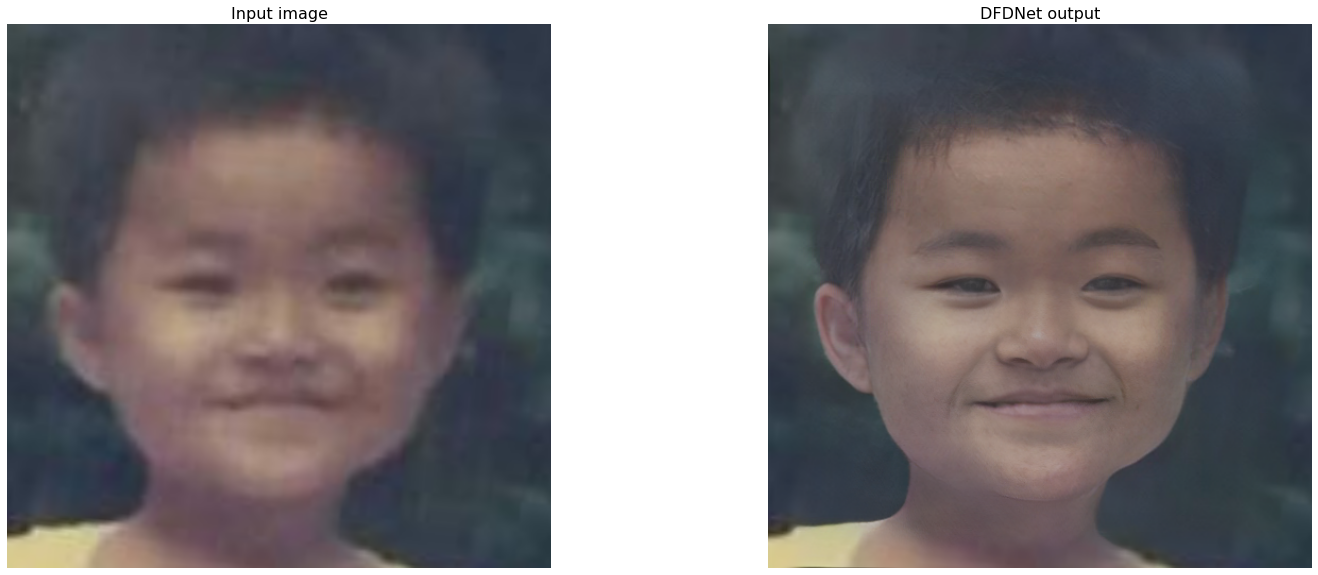

In [ ]:
# visualize
import os
import glob

result_folder = 'results/DFDNet/upload/final_results'
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

## 4. Download results

In [ ]:
# download the result
print(f'Download {result_folder}')
os.system(f'zip -r -j download.zip {result_folder}/*')
files.download("download.zip")

Download results/DFDNet/upload/final_results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>